In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon (only needs to be done once)
nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sentiment = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vinma\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
data = pd.read_csv("Copy of amazon.csv")
data.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


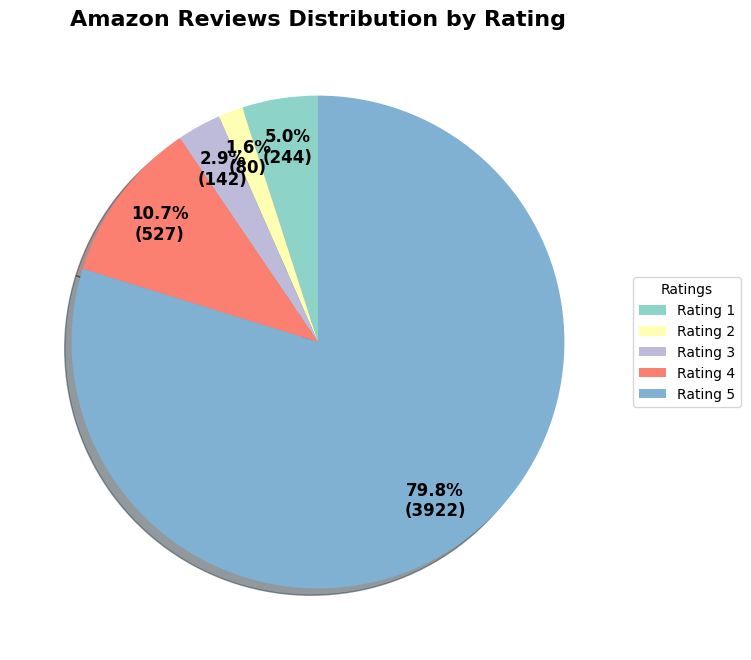

In [4]:
rating_counts = data['overall'].value_counts().sort_index()


colors = plt.cm.Set3.colors


plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(
    rating_counts,
    autopct=lambda p: f'{p:.1f}%\n({int(p*sum(rating_counts)/100)})',
    startangle=90,
    shadow=True,
    colors=colors,
    textprops={'fontsize': 12, 'weight': 'bold'},
    pctdistance=0.8,
    labeldistance=1.1
)

plt.legend(wedges, [f"Rating {i}" for i in rating_counts.index],
           title="Ratings", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Amazon Reviews Distribution by Rating", fontsize=16, weight='bold')
plt.show()

In [5]:
Sentiments = SentimentIntensityAnalyzer()
data["reviewText"] = data["reviewText"].astype(str).fillna("")
data["positive"] = [Sentiments.polarity_scores(i)["pos"] for i in data["reviewText"]]
data["negative"] = [Sentiments.polarity_scores(i)["neg"] for i in data["reviewText"]]
data["Neutral"] = [Sentiments.polarity_scores(i)["neu"] for i in data["reviewText"]]
data.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,positive,negative,Neutral
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0,0.000,0.688,0.312
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0,0.000,0.075,0.925
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0,0.000,0.077,0.923
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0,0.091,0.000,0.909
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0,0.127,0.038,0.835


In [6]:
x = sum(data["positive"])
y = sum(data["negative"])
z = sum(data["Neutral"])


In [7]:
def sentiment_score(a, b, c):
  if (a>b) and (a>c):
    print("Positive :) ")
  elif (b>a) and (b>c):
    print("Negative 😠")
  else:
    print("Neutral 🙂")
sentiment_score(x, y, z)



Neutral 🙂
